## Tutorial de Classificação com kMeans de um banco de sintético

Autor: Natanael Junior (natmourajr@gmail.com)

Laboratorio de Processamento de Sinais - UFRJ

In [1]:
%time
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from keras.utils import np_utils
from sklearn import datasets
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.cluster import KMeans

m_font_size = 20

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


Using Theano backend.
/home/natmourajr/.virtualenvs/se2017annecy2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs


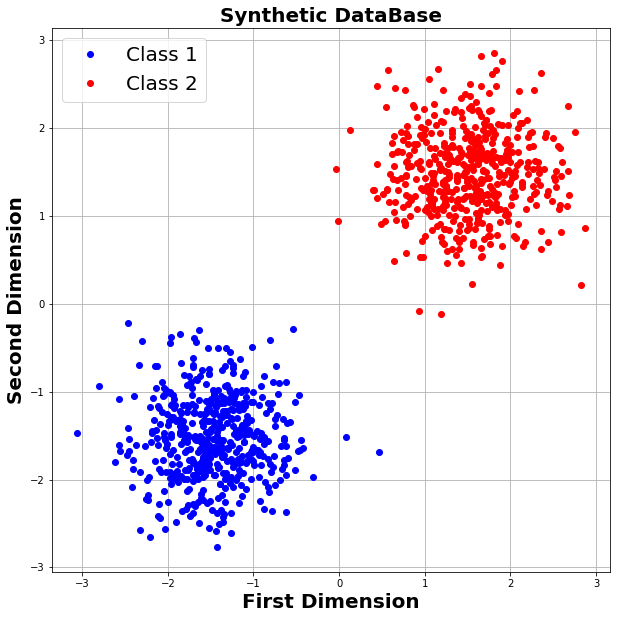

In [2]:
%time
# Create Data
n_events = 500

# dados em 45^o
angle = np.pi/2
rotation_matrix = [[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]]

m_means = [-1.5,1.5]
m_vars = [0.5,0.5]

data_c1 = m_vars*np.random.randn(n_events,2)+m_means
data_c1 = np.inner(data_c1,rotation_matrix)

m_means = [1.5,-1.5]
m_vars = [0.5,0.5]

data_c2 = m_vars*np.random.randn(n_events,2)+m_means
data_c2 = np.inner(data_c2,rotation_matrix)

data = np.append(data_c1, data_c2,axis=0)
trgt = np.append(np.zeros(data_c1.shape[0]),np.ones(data_c2.shape[0]),axis=0)

# plot data
%matplotlib inline  

fig = plt.figure(figsize=(10,10))

plt.plot(data[trgt==0,0],data[trgt==0,1],'bo',label='Class 1')
plt.plot(data[trgt==1,0],data[trgt==1,1],'ro',label='Class 2')

plt.legend(fontsize=m_font_size)
plt.grid()
plt.title('Synthetic DataBase',fontweight='bold',fontsize=m_font_size)
plt.xlabel('First Dimension',fontweight='bold',fontsize=m_font_size)
plt.ylabel('Second Dimension',fontweight='bold',fontsize=m_font_size)
#limits = [-5, 5]
#plt.xlim(limits)
#plt.ylim(limits)

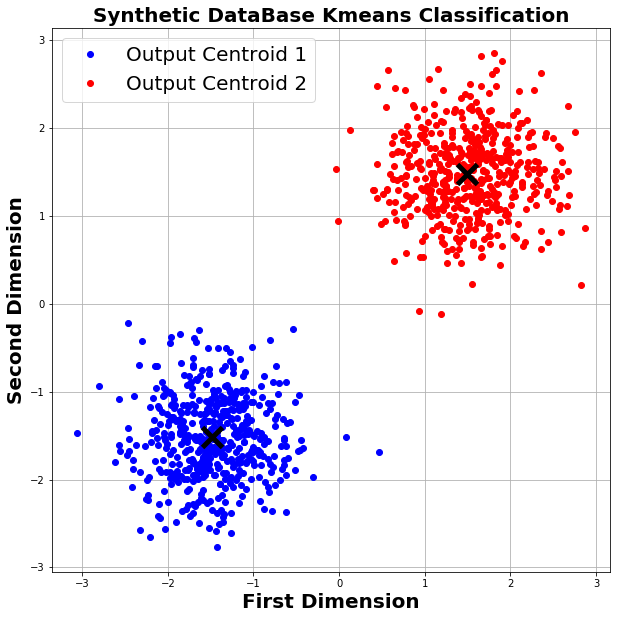

In [3]:
kmeans = KMeans(n_clusters=2).fit(data)

output = kmeans.predict(data)

fig = plt.figure(figsize=(10,10))
plt.plot(data[output==0,0],data[output==0,1],'bo',label='Output Centroid 1')
plt.plot(data[output==1,0],data[output==1,1],'ro',label='Output Centroid 2')
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
         'xk',markersize=20,mew=5)
plt.grid()
plt.legend(fontsize=m_font_size)
plt.title('Synthetic DataBase Kmeans Classification',fontweight='bold',fontsize=m_font_size)
plt.xlabel('First Dimension',fontweight='bold',fontsize=m_font_size)
plt.ylabel('Second Dimension',fontweight='bold',fontsize=m_font_size)
